In [6]:
from typing import TypedDict, Literal

class Portfolio(TypedDict):
    """
    Represents a portfolio with a name and a list of stock symbols.
    """
    amount_used: float
    total_usd: float
    total_currency: Literal['EUR', 'INR']
    total: float

In [33]:
def calc_total (state:Portfolio) -> Portfolio:
    state['total_usd'] = state['amount_used'] * 1.08 # Assuming a conversion rate of 1.0 for USD
    return state

def calc_total_inr (state:Portfolio) -> Portfolio:
    state['total'] = state['total_usd'] * 82.0 # Assuming a conversion rate of 82.0 for INR
    return state

def calc_total_eur (state:Portfolio) -> Portfolio:
    state['total'] = state['total_usd'] * 8.0 # Assuming a conversion rate of 82.0 for INR
    return state

def choose(state : Portfolio) -> str:
    return state["total_currency"]

In [34]:
from langgraph.graph import StateGraph, START,END

builder = StateGraph(Portfolio)

builder.add_node(
    "calc_total",
    calc_total,
)

builder.add_node(
    "calc_total_inr",
    calc_total_inr,
)

builder.add_node(
    "calc_total_eur",
    calc_total_eur,
)


builder.add_edge(START, "calc_total")
builder.add_conditional_edges(
    "calc_total",
    choose,
    {
        "INR": "calc_total_inr",
        "EUR": "calc_total_eur",
    }
)
builder.add_edge("calc_total_inr", END)
builder.add_edge("calc_total_eur", END)

graph = builder.compile()


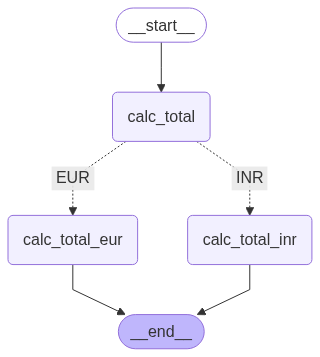

In [35]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [36]:
graph.invoke({"amount_used": 1000.0, "total_currency": "INR"})

{'amount_used': 1000.0,
 'total_usd': 1080.0,
 'total_currency': 'INR',
 'total': 88560.0}